#<a name='3'></a>
<div dir='rtl'>
<h1>3. مسئله‌ی Monty Hall</h1>
</div>

<div dir='rtl'>
همان‌طور که در درس بررسی شد، این مسئله نوعی معماست که توسط احتمالات می‌توان به بهترین استراتژی برای حل آن دست یافت.
</div>
<div dir='rtl'>
بار دیگری آن را بررسی می‌کنیم:
</div>
<div dir='rtl'>
سه در وجود دارد. پشت یکی از درها جایزه قرار داشته و پشت دو در دیگر دو 
بز ایستاده اند. 
</div>
<div dir='rtl'>
مجری از شرکت‌کننده می‌خواهد که یک در را انتخاب کند. پس از آن، مجری یکی از درها را که مطمئن است پشت آن جایزه وجود ندارد را باز می‌کند. پس از آن از شرکت‌کننده می‌خواهد یا تصمیم خود را نهایی کند و یا این‌که دری که انتخاب کرده را با در باقی‌مانده عوض کند. 
</div>

<div dir='rtl'>
در این تمرین سعی داریم با شبیه‌سازی تصمیم‌گیری در دو حالت بیان شده، بهترین استراتژی برای افزایش احتمال برد را بیابیم. 
</div>
<div dir='rtl'>
برای این مهم، ابتدا تابع شبیه‌سازی یک دور بازی را ایجاد می‌کنیم. 
</div>

In [1]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
# Output of function determines that the player is a winner or not. 

simulate_game = function(make_switch=FALSE){
  n_doors = 3

  # Create a integer vector for the door indices.
  doors = seq_len(n_doors)
  
  # Create a boolean vector showing which doors are opened.
  # All doors are closed at the start of the game.
  is_closed = rep(TRUE, length=3)
  
  # Sample one index for the door to hide the prize behind.
  # From now on, we call it the prize door. 
  prize_index = sample(doors, size=1)
  
  # Sample one index for the door initially chosen by the player.
  # This can be the same door as the prize door. So there is no need to 
  # eliminate any door.
  choice_index = sample(doors, size=1)
  
  # Now Monty Hall opens the door the player did not choose.
  # If the player has already picked the prize door, the one remaining 
  # closed door has a no prize.
  # If the player has not picked the prize door, the one remaining closed 
  # door has the prize.
  if (prize_index==choice_index){
    # If the player has the prize, Monty Hall has two options to choose from.
    # The door which the player has chosen (the prize door) needs to be eliminated.  
    is_closed[sample(doors[-prize_index], size=1)] = FALSE
  } else {
    # Else, Monty Hall has to open the one remaining door.
    # We  have to eliminate the chosen and the prize door.
    is_closed[-c(prize_index, choice_index)] = FALSE
  }
  
  # Now Monty Hall asks the player whether he/she wants to make a switch
  if (make_switch){
    # If the player decides to make a switch, then he/she has to pick 
    # one of the closed doors.
    # We need to make sure it is not the one the player chose initially. 
    choice_index = doors[is_closed][doors[is_closed]!=choice_index]
  }
  
  # Return a boolean value showing whether the player's choice is the prize door.
  return(choice_index==prize_index)
}

<div dir='rtl'>
حال تابعی می‌نویسیم که بازی را n بار انجام دهد.
</div>

In [2]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
#    n: Number of games we want to simulate. 
# Output of function determines the resutls of n games. 

simulate_n_games = function(n, make_switch=FALSE) 
{
  res <- replicate(n, simulate_game(make_switch))
  return(res)
}

<div dir='rtl'>
بازی را ۱۰۰۰ بار انجام می‌دهیم و آن را در یک dataframe ذخیره می‌کنیم.
</div>

<div dir='rtl'>
dataframe مانند یک جدول است که می‌توان نام هر ستون را به صورت دلخواه انتخاب کرد.
</div>

In [7]:
simulate_game = function(make_switch=FALSE){
  n_doors = 3

  # Create a integer vector for the door indices.
  doors = seq_len(n_doors)
  
  # Create a boolean vector showing which doors are opened.
  # All doors are closed at the start of the game.
  is_closed = rep(TRUE, length=3)
  
  # Sample one index for the door to hide the prize behind.
  # From now on, we call it the prize door. 
  prize_index = sample(doors, size=1)
  
  # Sample one index for the door initially chosen by the player.
  # This can be the same door as the prize door. So there is no need to 
  # eliminate any door.
  choice_index = sample(doors, size=1)
  
  # Now Monty Hall opens the door the player did not choose.
  # If the player has already picked the prize door, the one remaining 
  # closed door has a no prize.
  # If the player has not picked the prize door, the one remaining closed 
  # door has the prize.
  if (prize_index==choice_index){
    # If the player has the prize, Monty Hall has two options to choose from.
    # The door which the player has chosen (the prize door) needs to be eliminated.  
    is_closed[sample(doors[-prize_index], size=1)] = FALSE
  } else {
    # Else, Monty Hall has to open the one remaining door.
    # We  have to eliminate the chosen and the prize door.
    is_closed[-c(prize_index, choice_index)] = FALSE
  }
  
  # Now Monty Hall asks the player whether he/she wants to make a switch
  if (make_switch){
    # If the player decides to make a switch, then he/she has to pick 
    # one of the closed doors.
    # We need to make sure it is not the one the player chose initially. 
    choice_index = doors[is_closed][doors[is_closed]!=choice_index]
  }
  
  # Return a boolean value showing whether the player's choice is the prize door.
  return(choice_index==prize_index)
}

simulate_n_games = function(n, make_switch=FALSE) 
{
  res <- replicate(n, simulate_game(make_switch))
  return(res)
}

n_games = 1000

# Simulate games and store the boolean results in both cases.
results_without_switching = simulate_n_games(n=n_games, make_switch=FALSE)
results_with_switching = simulate_n_games(n=n_games, make_switch=TRUE)

# Store the cumulative wins in a dataframe.
results = data.frame(
  # First column
  game = seq_len(n_games), 
  # Second column
  cumulative_wins_without_switching = cumsum(results_without_switching),
  # Third column
  cumulative_wins_with_switching = cumsum(results_with_switching)
)

# Printing six rows of stored data.
head(results)


,game,cumulative_wins_without_switching,cumulative_wins_with_switching
,<int>,<int>,<int>
1,1,0,1
2,2,0,2
3,3,0,3
4,4,0,3
5,5,1,3
6,6,2,3


<div dir='rtl'>
حال می‌خواهیم نتایج را رسم کنیم تا دید بهتری نسبت به تعویض کردن/نکردن انتخاب اولیه بدست آید.
برای این کار از پکیج "ggplot" استفاده می‌کنیم.
</div>

In [4]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



<div dir='rtl'>
به‌علاوه برای این که اعداد را به‌صورت درصد بیان کرده و به صورت مرتب‌تری نمایش داده شوند نیز تابعی جدید تعریف می‌کنیم. 
</div>

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


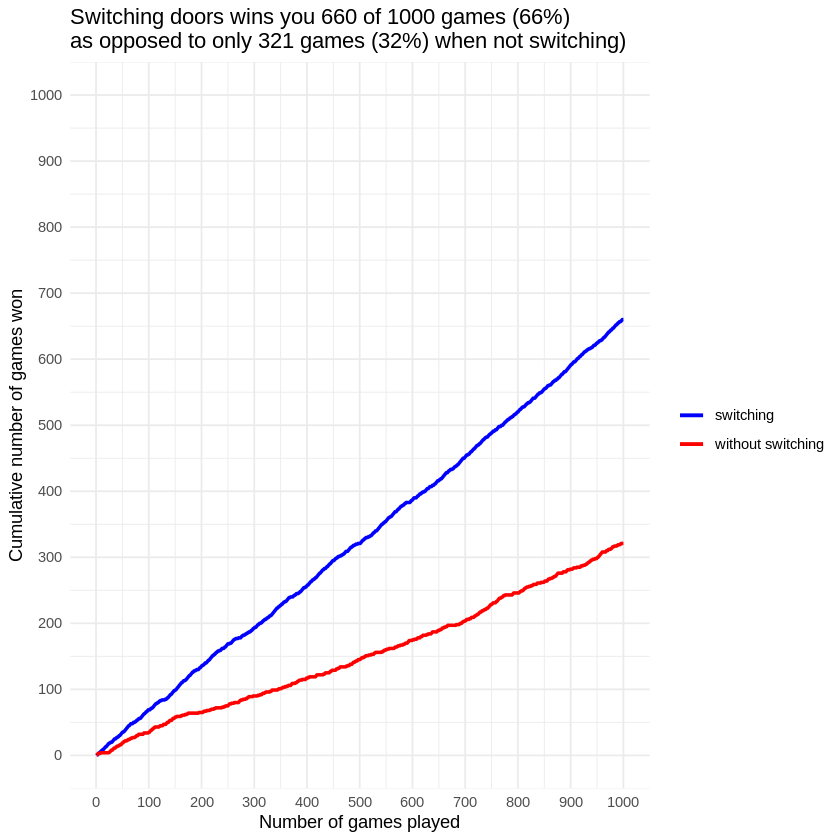

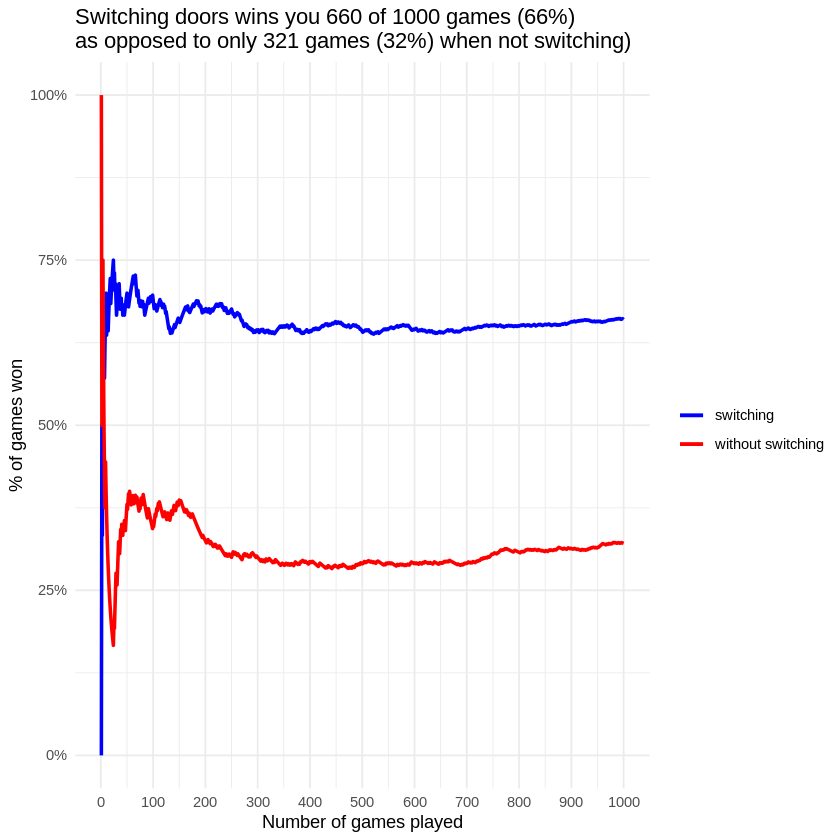

In [5]:
library(ggplot2)

# Inputs:
#    values: Input numbers
# Output of function is the percenage form of the input number in a nice form.
format_percentage = function(values){
  return(paste0(formatC(values*100, digits=0, format='f'), '%'))
}

# Generate a title based on the results of the simulations
title = paste(
  paste0(
    'Switching doors wins you ', sum(results_with_switching), ' of ', n_games,
     ' games (', format_percentage(mean(results_with_switching)), ')'
     ),
  paste0(
    'as opposed to only ', sum(results_without_switching), ' games (', 
    format_percentage(mean(results_without_switching)), ') when not switching)'),
  sep = '\n'
)


# Set some basic plotting parameters
# Size of the plotted lines
linesize = 1 
# Breaks of the axes
x_breaks = y_breaks = seq(from=0, to=n_games, length.out=11)
# Limits of the y axis - makes y limits match x limits
y_limits = c(0, n_games) 
# Make a named color scheme
palette = setNames(c('blue', 'red'), nm=c('switching', 'without switching')) 

# Make a line plot of the cumulative wins with and without switching
ggplot(data=results) +
  geom_line(
    aes(x=game, y=cumulative_wins_with_switching, col=names(palette[1])), 
    size=linesize
    ) +
  geom_line(
    aes(x=game, y=cumulative_wins_without_switching, col=names(palette[2])), 
    size = linesize
    ) +
  scale_x_continuous(breaks=x_breaks) +
  scale_y_continuous(breaks=y_breaks, limits=y_limits) +
  scale_color_manual(values=palette) +
  theme_minimal() +
  theme(legend.background=element_rect(fill='white', color='transparent')) +
  labs(x='Number of games played') +
  labs(y='Cumulative number of games won') +
  labs(col=NULL) +
  labs(title=title)


# Make a line plot of the rolling % win chance with and without switching
ggplot(data=results) +
  geom_line(
    aes(x=game, y=cumulative_wins_with_switching/game, col=names(palette[1])), 
    size=linesize
    ) +
  geom_line(
    aes(x=game, y=cumulative_wins_without_switching/game, col=names(palette[2])),
     size=linesize) +
  scale_x_continuous(breaks=x_breaks) +
  scale_y_continuous(labels=function(x) format_percentage(x)) +
  scale_color_manual(values=palette) +
  theme_minimal() +
  theme(legend.background=element_rect(fill='white', color='transparent')) +
  labs(x='Number of games played') +
  labs(y='% of games won') +
  labs(col=NULL) +
  labs(title=title)



<div dir='rtl'>
<font color='red'  background-color: blue>
باتوجه به نتیجه‌ی شبیه‌سازی، بهترین استراتژی برای افزایش احتمال رسیدن به جایزه را بیان کنید.
</div>
<div dir='rtl'>
<font color='black'  background-color: white>
با توجه به نتایج به دست آمده از این آزمایش، میتوانیم نتیجه بگیریم که با عوض کردن در انتخابی، میتوانیم شانس خود را برای بردن جایزه 2 برابر کنیم ( همانگونه که از تئوری هم انتظار داشتیم).
طبق این آزمایش شانس برد با تغییر درب حدود 2/3 و بدون تغییر درب حدود 1/3 است.
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
موارد مختلفی که باعث افزایش درک نسبت به تغییرات نمودار در طول شبیه‌سازی می‌شود را به کد داده شده اضافه کنید.
</div>
<div dir='rtl'>
با توجه به کدی که برای تابع "simulate_n_games" زدید، for loop های مربوط به قسمت بیز را بهینه کنید.
</font>
</div>